In [1]:
import cv2
import numpy as np
#we will try to detect the face of individuals using the haarcascade_frontalface_default.xml
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    #Now the 2nd step is to load the image and convert it into gray-scale.
    '''Generally the images that we see are in the form of RGB channel(Red, Green, Blue). So, when OpenCV reads the RGB image,
     it usually stores the image in BGR (Blue, Green, Red) channel. For the purposes of image recognition, we need to convert this BGR channel to gray channel.
     The reason for this is gray channel is easy to process and is computationally less intensive as it contains only 1-channel of black-white.'''
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    '''Now after converting the image from RGB to Gray, we will now try to locate the exact features in our face.
    This detectMultiScale() function will help us to find the features/locations of the new image.
    The way it does is, it will use all the features from the face_classifier object to detect the features of the new image.'''

    '''Parameters for detectMultiScale(gray scale variable,scaleFactor,minNeighbors)'''
    '''scaleFactor = Parameter specifying how much the image size is reduced
                    at each image scale.

       minNeighbors = Parameter specifying how many neighbors each candidate rectangle should have to retain it.
                    This parameter will affect the quality of the detected faces. Higher value results in fewer detections but with higher quality.
                    3~6 is a good value for it. In our case, I have taken 5 as the minNeighbors and this has worked perfectly for the image that I have used.'''

    '''detectMultiScale returns 4 values — x-coordinate, y-coordinate, width(w) and height(h) of the detected feature of the face.
                        Based on these 4 values we will draw a rectangle around the face.'''
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    if faces is():
        return None
    for(x,y,w,h) in faces:
        cropped_faces=img[y:y+h,x:x+w]


    return cropped_faces



cap=cv2.VideoCapture(0)
count=0

while True:
    ret,frame=cap.read()
    '''Extract face , convert to grayscale and save it in out folders'''

    if face_extractor(frame) is not None:
        count+=1
        face=cv2.resize(face_extractor(frame),(200,200))
        face=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path=r'/Users/nitinskumar/Desktop/untitled folder 2/Images'+str(count)+'.jpg'

        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow('Face Cropper',face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1)==13 or count==200:
        break
cap.release()
cv2.destroyAllWindows()
print("Collecting Samples Complete!!")

<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/ly/p5tg38rs2l97skvhy7ny87tm0000gn/T/ipykernel_5922/931479085.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


Face not found


2
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/var/folders/ly/p5tg38rs2l97skvhy7ny87tm0000gn/T/ipykernel_6001/2983564065.py:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


13/13 [==============================] - 57s 5s/step - loss: 0.6660 - accuracy: 0.7778 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/2
13/13 [==============================] - 62s 5s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000


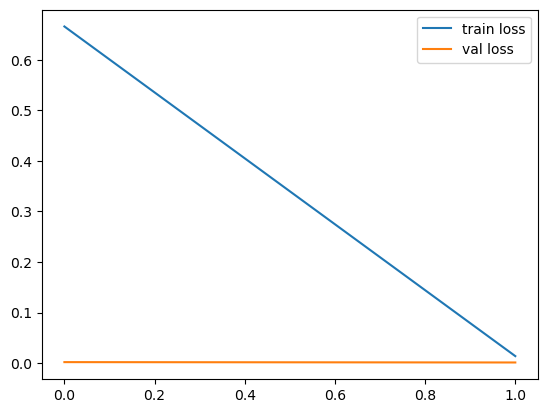

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/nitinskumar/Desktop/untitled folder 2/Train'
valid_path = '/Users/nitinskumar/Desktop/untitled folder 2/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False



folders = glob(r'/Users/nitinskumar/Desktop/untitled folder 2/Train/*')
print(len(folders))

# No of layers
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/Users/nitinskumar/Desktop/untitled folder 2/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/Users/nitinskumar/Desktop/untitled folder 2/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
print(len(training_set))

print(len(test_set))

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

##Saving the model
model.save('final_model.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/var/folders/ly/p5tg38rs2l97skvhy7ny87tm0000gn/T/ipykernel_6001/2481703597.py:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


13/13 [==============================] - 62s 5s/step - loss: 0.3775 - accuracy: 0.8081 - val_loss: 8.1566e-04 - val_accuracy: 1.0000
Epoch 2/2
13/13 [==============================] - 64s 5s/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 8.5953e-04 - val_accuracy: 1.0000


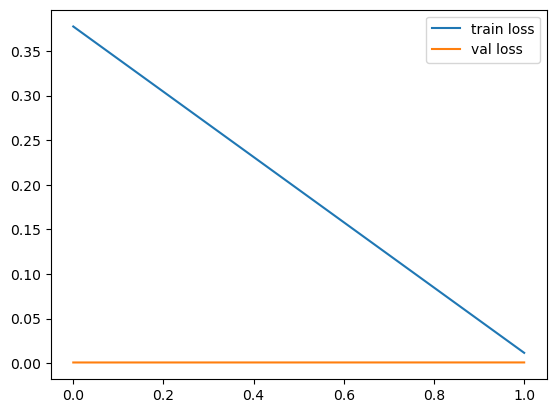

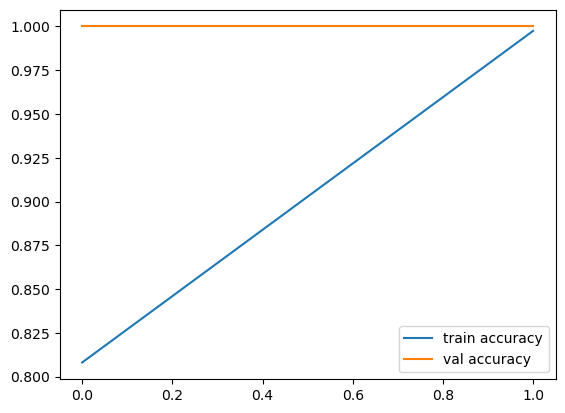

/Users/nitinskumar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/Users/nitinskumar/Desktop/untitled folder 2/Train'
valid_path = r'/Users/nitinskumar/Desktop/untitled folder 2/Test'

# Add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

# Number of classes
folders = glob(r'/Users/nitinskumar/Desktop/untitled folder 2/Train/*')
num_classes = len(folders)

# Flatten the output of VGG
x = Flatten()(vgg.output)
# Add a Dense layer with softmax activation for classification
prediction = Dense(num_classes, activation='softmax')(x)

# Create a model
model = Model(inputs=vgg.input, outputs=prediction)

# View the structure of the model
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ImageDataGenerator for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# ImageDataGenerator for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of data for training and test sets
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=IMAGE_SIZE,
                                            batch_size=32,
                                            class_mode='categorical')

# Print the number of samples in training and test sets
print("Number of training samples:", len(training_set))
print("Number of test samples:", len(test_set))

# Fit the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=2,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

# Plot and save the training history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# Save the model
model.save('final_model.h5')

In [ ]:
# Face Recognition

# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np

from keras.preprocessing import image
model = load_model('final_model.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    if faces is ():
        return None

    # Crop all faces found
    for (x,y,w,h) in faces:
        #adding rectangle around your face
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face



#Face Recognition with the webcam
'''Extract test face , resize the image to feed to VGG16(224x224x3) , convert to nd-array, predict'''
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()

    model = load_model('final_model.h5')
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')

           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)

        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)

        name="None matching"

        if(pred[0][0]>0.5):
            name='Nitin'
        if(pred[0][1]>0.5):
            name='Sruthi'
        
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/ly/p5tg38rs2l97skvhy7ny87tm0000gn/T/ipykernel_6001/3121915176.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


1/1 [==============================] - 0s 176ms/step
[[1.000000e+00 6.588995e-26]]
1/1 [==============================] - 0s 145ms/step
[[0.82876104 0.17123896]]
1/1 [==============================] - 0s 148ms/step
[[1.000000e+00 6.160071e-38]]
1/1 [==============================] - 0s 147ms/step
[[1. 0.]]
1/1 [==============================] - 0s 148ms/step
[[1. 0.]]
1/1 [==============================] - 0s 148ms/step
[[1. 0.]]
1/1 [==============================] - 0s 147ms/step
[[1.000000e+00 8.240895e-28]]
1/1 [==============================] - 0s 146ms/step
[[1.0000000e+00 1.5695315e-26]]
1/1 [==============================] - 0s 147ms/step
[[1. 0.]]
1/1 [==============================] - 0s 148ms/step
[[1. 0.]]
1/1 [==============================] - 0s 146ms/step
[[0. 1.]]
1/1 [==============================] - 0s 146ms/step
[[4.4090494e-35 1.0000000e+00]]
1/1 [==============================] - 0s 147ms/step
[[1.520498e-28 1.000000e+00]]
1/1 [==============================] - 0s